<a href="https://colab.research.google.com/github/yahav1349/Languange-NLP-and-Cognition-Project/blob/main/project_Sapahi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Structured Task**

##**General**

In [1]:
# Download and extract the data and learn_decoder.py
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!unzip files.zip
!rm files.zip

--2023-07-03 14:47:02--  https://docs.google.com/uc?export=download&confirm=t&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.138, 142.251.2.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7vk1h2s3lfj68vi50g5tgr1tg6qkcvkb/1688395575000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download&uuid=8f577eea-dac0-44e6-9084-41cd1c4c8608 [following]
--2023-07-03 14:47:02--  https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7vk1h2s3lfj68vi50g5tgr1tg6qkcvkb/1688395575000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download&uuid=8f577eea-dac0-44e6-9084-41cd1c4c8608
Resolving doc-0g-54-docs.googleusercontent.com (doc-0g-54-docs.googleusercontent.com)... 142.250.141.132, 260

In [2]:
!pip install gensim
from gensim import downloader
import numpy as np
import matplotlib.pyplot as plt

After reading the paper, we understand differnetly how to rank distance between vectors.

1 will meam that the true vec is the closest to the embedded one.

0 will meam that the true vec is the farthest from the embedded one.

In [3]:
## all q3 functions
def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
    nominator = np.dot(x,y)
    denominator = root_square(x) * root_square(y)
    return nominator/ denominator


def root_square(vector):
  square_sum = 0
  for num in vector:
    square_sum += pow(num, 2)
  return np.sqrt(square_sum)

def distance_vec(decoded_vector, true_vector, vectors):
  true_dis = cosine_similarity(decoded_vector, true_vector)
  closeness_list = [cosine_similarity(decoded_vector,k) for k in vectors]
  closeness_list.sort()
  return (closeness_list.index(true_dis) + 1)/len(vectors)

In [4]:
def plot_model_results(results, model_name):
  x = [i + 1 for i in range(18)]
  y= results
  fig = plt.figure(figsize = (10, 5))

  # creating the bar plot
  plt.bar(x, y, color ='maroon',
          width = 0.4)

  plt.xlabel("Fold number")
  plt.xticks(np.arange(1,len(x)+1),x)
  plt.ylabel("Avarage accuracy score")
  plt.title(f"Averaged accuracy score for each fold for {model_name} model")
  plt.show()

In [5]:
from learn_decoder import *

#and the data
data = read_matrix("imaging_data.csv", sep=",")
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts
glove_vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")

##**Bullet 1**

we chose to use word2vec embedding

In [ ]:
#each vector is in the length of 300
model = downloader.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#build vectors matrix for word2vec
def build_vectors():
  vectors = np.zeros((180,300))
  for index,concept in enumerate(concepts):
    if concept in model.key_to_index:
      vectors[index] = model[concepts[index]]
    else:
      vectors[index] = model['UNK']
  return vectors

In [ ]:
def k_folds(i, vectors):
  validation_set = data[i * 10 : (i + 1) * 10]
  small_index_data = data[:i * 10]
  big_index_data = data[(i+1)*10::]
  train_data = np.concatenate((small_index_data, big_index_data), axis=0)
  small_index_vec = vectors[:i * 10]
  big_index_vec = vectors[(i+1)*10::]
  train_vec = np.concatenate((small_index_vec, big_index_vec), axis=0)
  M = learn_decoder(train_data,train_vec)
  return np.dot(validation_set,M)

In [ ]:
def model_results(vectors):
  rank_list = []
  concept_dict = {}
  concept_nums = {}
  for fold in range(18):
    total = 0
    decoded_vectors = k_folds(fold, vectors)
    for ind, sample in enumerate(decoded_vectors):
      vec = vectors[fold*10 + ind].reshape(300,1)
      dis = distance_vec(sample, vectors[fold*10 + ind],vectors)
      total +=dis
      concept_dict[concepts[fold*10 + ind]] = dis
    rank_list.append(total/10)
  return rank_list

We will now plot the results with the new word2vec embedding

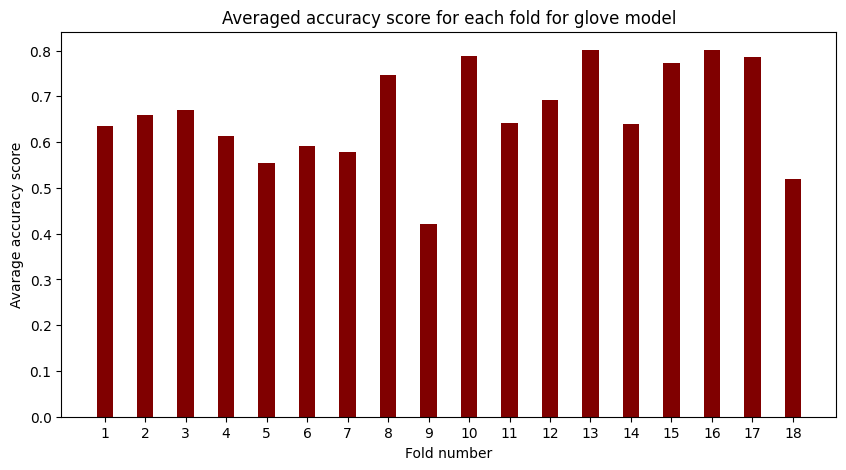

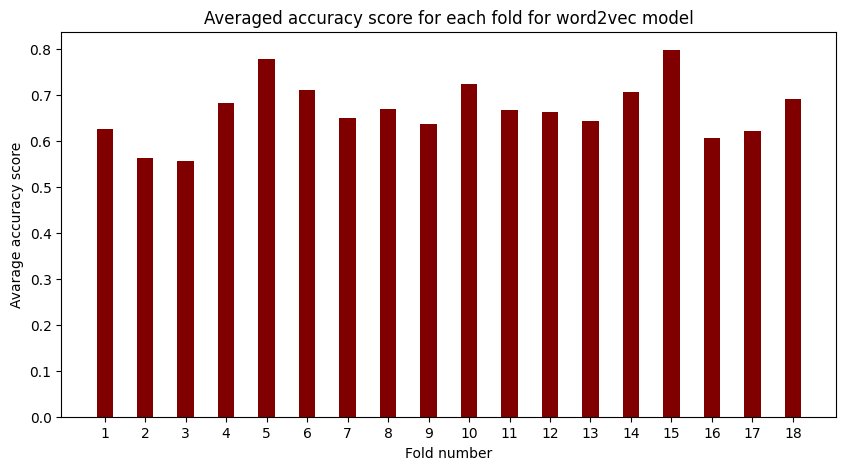

In [ ]:
word2vec_vectors = build_vectors()
glove_model = model_results(glove_vectors)
word2vec_model = model_results(word2vec_vectors)
plot_model_results(glove_model, 'glove')
plot_model_results(word2vec_model, 'word2vec')

In [ ]:
def static_analayzing(model_results, name):
  model_results = np.array(model_results)
  print(f'The avarage of the {name} model results is {np.mean(model_results)}')
  print(f'The std of the {name} model results is {np.std(model_results)}')
  print(f'The median of the {name} model results is {np.median(model_results)}')

In [ ]:
static_analayzing(glove_model, 'glove')
print('')
static_analayzing(word2vec_model, 'word2vec')

The avarage of the glove model results is 0.6616049382716048
The std of the glove model results is 0.10436542993736615
The median of the glove model results is 0.6502777777777777

The avarage of the word2vec model results is 0.6653086419753085
The std of the word2vec model results is 0.061994518935073295
The median of the word2vec model results is 0.663888888888889


For the GloVe model, the following statistical measures were calculated:

The average result was determined to be 0.66 (rounded to two decimal places for convenience).
The standard deviation was computed to be 0.1, indicating the degree of dispersion from the average.
The median result was calculated to be 0.65, demonstrating the middle value of the model's result set.

As for the Word2Vec model, the statistical computations were as follows:

The average result was computed to be 0.67, slightly higher than that of the GloVe model.
The standard deviation was found to be 0.06, representing a considerably lower spread around the mean compared to the GloVe model.
The median result was determined to be 0.66, representing the middle value in this case.
Upon careful analysis, it can be observed that the Word2Vec model has proven to give us superior results overall. Despite the average result being marginally better, which is beneficial in this context, the significantly lower standard deviation of the Word2Vec model warrants special mention. This suggests a higher level of precision and robustness, thereby making it a more reliable choice.

## **Bullet 2**

**Similarities:**

*Training:*

In all three analyses, a decoder was trained on brain images related to 180 semantic concepts from a prior experiment. The 5000 most informative voxels were selected and used for this training process. This decoder was then applied to brain images from sentences in experiments 2 and 3, creating a semantic vector for each sentence.

Control Analysis: All three experiments involved control analyses to ensure that the results weren't skewed by differences in the number of content words in the sentences being analyzed.

*Validation:*

For all three analyses, the decoded vectors were evaluated using progressively difficult classification tasks. These tasks compared sentences about different topics, passages within the same topic, and different sentences from the same passage. The aim was to distinguish sentences at various levels of granularity.

Significance Testing: The researchers used a conservative approach for testing statistical significance in all three analyses. They performed a Bonferroni correction to adjust the p-values and control for the risk of type I errors due to multiple comparisons.
The rank accuracy over 384 and 243 sentences in experiments 2 and 3, respectively, which were significant for all subjects (mean accuracy: 0.76 and 0.79; all significant p-values < 0.01, using a test based on a normal approximation to the null distribution, with Bonferroni correction for the number of participants and experiments.

**Differences:**

*Experiment 1:*

The initial 180 concepts for training the decoder came from hand-selected representative words from each of the remaining 180 regions. This analysis appears to have served as a foundation for the subsequent experiments, providing the initial training data for the decoder.
used individual concepts as stimuli, with two goals.

The first was to validate our approach to sampling the semantic space by testing whether a decoder trained on imaging data for individual concepts would generalize to new concepts. The second goal was to comparatively evaluate three experimental approaches to highlighting the relevant meaning of a given word, necessary because most words are ambiguous.

*Experiment 2:*

The second experiment focused on applying the trained decoder to brain images associated with sentences. The sentences were evaluated on different levels of granularity, from different topics to different passages within the same topic, to different sentences within the same passage. The success of the decoder was measured by how accurately it could classify these different sentences.
used text passages as stimuli. Their goal was to test whether a decoder trained on individual concept imaging data would decode semantic vectors from sentence imaging data.
used materials developed for a prior unpublished study.
used a set of 96 text passages, each consisting of 4 sentences about a particular concept.
Included  further averaging the images for each concept across the three paradigms.

*Experiment 3:*

The third experiment was similar to the second one, but seemed to go a step further by also conducting an open-ended decoding task to see how well the decoded vectors could be used to identify content words in the sentences. The vectors were also ranked, and the rank accuracy was measured and found to be significant for all subjects.
used text passages as stimuli. Their goal was to test whether a decoder trained on individual concept imaging data would decode semantic vectors from sentence imaging data.
used materials developed by our funding agency.
Included  further averaging the images for each concept across the three paradigms.
used a set of 72 text passages, each consisting of 4 sentences about a particular concept
In the open ended decoding task which determine how well the decoded vectors can be used to identify the content, The median scores in the null model were 0.86 and 0.88, but with a very different distribution. The highest ranked word is in the top 1% for 24% of the sentences in experiment 2 and 33% of the sentences in experiment 3 (median across subjects).

In summary, all three experiments shared a common methodology but served different purposes, with each subsequent experiment building upon the previous one and adding additional elements to the analysis.


## **Bullet 3**

In [44]:
from learn_decoder import *

In [45]:
import pickle
import numpy as np
def open_pkl(path):
  with open(path, 'rb') as file:
      data = pickle.load(file)
  return data

In [46]:
def create_vectors(path, size):
  mat = np.zeros((size, 300))
  with open(path, 'r') as file:
      data = file.readlines()
      for i,line in enumerate(data):
        line = line.split()
        row = np.array(line)
        mat[i] = row
  return mat

In [47]:
import pandas as pd
def read_csv(csv_path):
  x = pd.read_csv(csv_path)
  df = x[x.columns[1:]]
  return df

In [48]:
def create_data_mat(df):
  mat = np.zeros((180,185866))
  for index in range(180):
    mat[index] = df.iloc[index]
  return mat

In [49]:
csv_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /neuralData_for_EXP1.csv'
df = read_csv(csv_path)
ex1_data = create_data_mat(df)

In [54]:
def model_results(vectors, decoded_vectors):
  rank_list = []
  sen_dict = {}
  concept_nums = {}
  for ind, sample in enumerate(decoded_vectors):
    dis = distance_vec(sample, vectors[ind], vectors)
    sen_dict[ind+1] = dis
  return sen_dict

###Exp2

In [38]:
exp2_size = 384
data_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP2.pkl'
vectors_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_384sentences.GV42B300.average.txt'

In [39]:
exp2_data =open_pkl(data_path)
exp2_data_mat = exp2_data['Fmridata']
exp2_vectors = create_vectors(vectors_path, exp2_size)

In [40]:
def create_decoded_vectors_exp2(data, vectors):
  M = learn_decoder(data, vectors)
  decoded = np.dot(exp2_data_mat, M)
  return decoded

In [50]:
decoded_exp2 = create_decoded_vectors_exp2(ex1_data, glove_vectors)

In [55]:
sen_dict_exp2 = model_results(exp2_vectors, decoded_exp2)

we will evaluate the avarage ranking

In [ ]:
total = 0
for key in sen_dict_exp2.keys():
  total += sen_dict_exp2[key]
avarage = total/exp2_size
print(f'The avarage ranking for a sentence in Exp2 is {avarage}')

The avarage ranking for a sentence in Exp2 is 0.5939398871527776


Despite the model being trained on an alternative dataset, it yielded an average result of 156.92. This figure is significantly superior compared to the 0.5 average result of the  dummy model.

These results offer a solid indication that the training process has indeed been effective, substantiating the fact that it has facilitated the model to enhance its performance outcomes.

### Ex3

In [ ]:
exp3_size = 243
data_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP3.pkl'
vectors_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_243sentences.GV42B300.average.txt'

In [ ]:
exp3_data =open_pkl(data_path)
exp3_data_mat = exp3_data['Fmridata']
exp3_vectors = create_vectors(vectors_path, exp3_size)

In [ ]:
def create_decoded_vectors_exp3(data, vectors):
  M = learn_decoder(data, vectors)
  decoded = np.dot(exp3_data_mat, M)
  return decoded

In [ ]:
decoded_exp3 = create_decoded_vectors_exp3(ex1_data, glove_vectors)

In [ ]:
sen_dict_exp3 = model_results(exp3_vectors, decoded_exp3)

we will evaluate the avarage ranking

In [ ]:
total = 0
for key in sen_dict_exp3.keys():
  total += sen_dict_exp3[key]
avarage = total/exp3_size
print(f'The avarage ranking for a sentence in Exp2 is {avarage}')

The avarage ranking for a sentence in Exp2 is 0.5895273416992672


In similar to EX2, despite the model being trained on an alternative dataset, it yielded an average result of 0.58. This figure is significantly superior compared to the 0.5 average result of the  dummy model. These results offer a solid indication that the training process has indeed been effective, substantiating the fact that it has facilitated the model to enhance its performance outcomes.

##**Bullet 4**

In [35]:
def category_index_from_sen(sen_dict, exp_data):
  num_passes = len(exp_data['labelsPassageCategory'])
  num_categories = len(exp_data['keyPassageCategory'][0])
  passes_dict = {i+1: [] for i in range(num_passes)}
  category_dict = {i+1: [] for i in range(num_categories)}
  for index, sen in enumerate(exp_data['labelsPassageForEachSentence']):
    passes_dict[sen[0]].append(sen_dict[index+1])
  for index, passage in enumerate(exp_data['labelsPassageCategory']):
    category_dict[passage[0]].append([sen for sen in passes_dict[index+1]])
  for key in category_dict.keys():
    category_dict[key] = [item for sublist in category_dict[key] for item in sublist]
  return category_dict

In [36]:
def category_from_sen(index_category_dict, exp_data):
  category_dict = {exp_data['keyPassageCategory'][0][i][0]: [] for i in range(len(exp_data['keyPassageCategory'][0]))}
  for index, key in enumerate(category_dict.keys()):
    category_dict[key] = index_category_dict[index + 1]
  return category_dict

### Exp2

In [56]:
index_category_dict_exp2 = category_index_from_sen(sen_dict_exp2, exp2_data)
category_dict_exp2 = category_from_sen(index_category_dict_exp2, exp2_data)

In [57]:
final_dict_exp2 = {key: np.mean(category_dict_exp2[key]) for key in category_dict_exp2.keys()}

In [ ]:
final_dict_exp2

{'animal': 0.49153645833333326,
 'appliance': 0.7063802083333334,
 'bird': 0.5955403645833333,
 'body_part': 0.8191731770833333,
 'building_part': 0.5895182291666667,
 'clothing': 0.5851236979166667,
 'crime': 0.5732421875,
 'disaster': 0.61376953125,
 'drink_non_alcoholic': 0.7449544270833334,
 'dwelling': 0.70654296875,
 'fish': 0.6057942708333334,
 'fruit': 0.54345703125,
 'furniture': 0.6591796875,
 'human': 0.7610677083333333,
 'insect': 0.5341796875,
 'kitchen_utensil': 0.634765625,
 'landscape': 0.54296875,
 'music': 0.5208333333333334,
 'place': 0.5924479166666666,
 'profession': 0.35384114583333337,
 'tool': 0.60400390625,
 'vegetable': 0.3837890625,
 'vehicles_transport': 0.5164388020833333,
 'weapon': 0.5760091145833333}

It appears that the average results presented are reasonable and intuitive considering the nature of the cognitive task at hand. This task, involving the prediction of various categories based on voxel data, would yield differing results for each category based on the inherent complexity and cognitive representation of each.

A case in point is the 'body_part' category which yields a particularly low average result, indicating a high level of accuracy. This can be attributed to the unambiguous nature of 'body parts', where clear, precise definitions and cognitive representation exist. Consequently, when the model is tasked to predict or identify body parts, it performs extremely well due to the limited scope for misinterpretation or error. This characteristic is not exclusive to 'body parts', but is likely shared by other categories with a similar clarity of definition, such as 'appliance' and 'dwelling' and 'human'.

It's important to note that these average results are computed based on a variety of sentences collected within each category. In the case of 'body_part', for instance, it stands to reason that most sentences relating to body parts would possess a similar degree of clarity and specificity, hence leading to a lower (and thus, better) average score.

It's also crucial to mention that some categories naturally embody a broader spectrum of concepts, such as 'profession' or 'vegetable', leading to higher average scores. These categories have a wider range of associated terminologies and concepts, potentially leading to greater variability in voxel representations, and consequently, higher average scores.

In conclusion, these results reflect the relationship between the cognitive distinctiveness of each category and the accuracy of voxel-based predictions.

### Exp3

In [ ]:
index_category_dict_exp3 = category_index_from_sen(sen_dict_exp3, exp3_data)
category_dict_exp3 = category_from_sen(index_category_dict_exp3, exp3_data)

In [ ]:
final_dict_exp3 = {key: np.mean(category_dict_exp3[key]) for key in category_dict_exp3.keys()}

In [ ]:
final_dict_exp3

{'astronaut': 0.5485596707818929,
 'beekeeping': 0.3052749719416386,
 'blindness': 0.5724279835390946,
 'bone_fracture': 0.7239057239057239,
 'castle': 0.7609053497942386,
 'computer_graphics': 0.6358024691358024,
 'dreams': 0.7868312757201646,
 'gambling': 0.7094650205761316,
 'hurricane': 0.5934156378600823,
 'ice_cream': 0.5119341563786008,
 'infection': 0.5176954732510288,
 'law_school': 0.7234567901234568,
 'lawn_mower': 0.3946502057613169,
 'opera': 0.7422371866816312,
 'owl': 0.3925925925925926,
 'painter': 0.6711934156378601,
 'pharmacist': 0.4419753086419753,
 'polar_bear': 0.6679012345679013,
 'pyramid': 0.3983539094650206,
 'rock_climbing': 0.5589225589225589,
 'skiing': 0.4711934156378602,
 'stress': 0.7646090534979424,
 'taste': 0.6803840877914953,
 'tuxedo': 0.5868312757201647}


The average results provided in this context are similarly logical given the specifics of the cognitive task involved. This task, involving the prediction of various themes or concepts based on voxel data, is expected to yield different outcomes for each theme based on its inherent complexity and cognitive representation.

Take, for instance, the 'bone_fracture' category, which demonstrates a low average result indicative of superior accuracy. The explanation for this lies in the clarity and specificity of the concept. When the model is tasked with predicting or identifying something as specific and unambiguous as 'bone_fracture', it performs admirably due to the limited room for error or misinterpretation. This is also the case with other specific and distinct categories such as 'castle', 'gambling', and 'stress'.

It is crucial to acknowledge that these averages are calculated based on an assortment of sentences linked with each theme. For example, with the 'bone_fracture' category, it is plausible that most sentences revolving around this theme would exhibit a similar level of clarity and distinctiveness, resulting in a lower (and hence, better) average score.

In contrast, categories like 'beekeeping' or 'lawn_mower', which can encompass a wide array of concepts and terminologies, tend to result in higher average scores. These themes may encompass a broader range of cognitive representations, which could lead to greater variability in voxel predictions and subsequently higher averages.

To summarize, these results elucidate the relationship between the cognitive distinctiveness of each theme and the prediction accuracy of voxel-based models. The more specific and unambiguous the category, the more accurate the model is likely to be. Conversely, broader or more ambiguous themes might present a greater challenge, which is reflected in the higher average scores.

# **Semi-structured Tasks**

## **Bullet 1**

We chose to do the assignment with EXp2 dataset

In [ ]:
from learn_decoder import *
import pandas as pd
import numpy as np

In [ ]:
import pickle
def open_pkl(path):
  with open(path, 'rb') as file:
      data = pickle.load(file)
  return data

In [ ]:
def create_vectors(path, size):
  mat = np.zeros((size, 300))
  with open(path, 'r') as file:
      data = file.readlines()
      for i,line in enumerate(data):
        line = line.split()
        row = np.array(line)
        mat[i] = row
  return mat

In [ ]:
def create_decoded_vectors(data, vectors):
  M = learn_decoder(data, vectors)
  return M

In [ ]:
def model_results(vectors, decoded_vectors):
  rank_list = []
  sen_dict = {}
  concept_nums = {}
  for ind, sample in enumerate(decoded_vectors):
    dis = distance_vec(sample, vectors[ind], vectors)
    sen_dict[ind+1] = dis
  return sen_dict

In [ ]:
exp2_size = 384
exp3_size = 243
data_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP2.pkl'
vectors_exp2_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_384sentences.GV42B300.average.txt'
vectors_exp3_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_243sentences.GV42B300.average.txt'
data_3_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP3.pkl'

In [ ]:
exp2_data =open_pkl(data_path)
exp2_data_mat = exp2_data['Fmridata']
exp3_data =open_pkl(data_3_path)
exp3_data_mat = exp3_data['Fmridata']

The sentence representations that were used
in the paper

In [ ]:
exp2_vectors = create_vectors(vectors_exp2_path, exp2_size)
M_paper = create_decoded_vectors(exp2_data_mat, exp2_vectors)

In [ ]:
exp3_vectors = create_vectors(vectors_exp3_path, exp3_size)

The sentence representations with BERT

In [ ]:
!pip install -U  -q sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
model_1 = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
from sentence_transformers.datasets.SentencesDataset import SentencesDataset
sentences_exp2 = []
for sen in exp2_data['keySentences']:
  sentences_exp2.append(sen[0][0])
embeddings_exp2 = model_1.encode(sentences_exp2)
print(embeddings_exp2.shape)

(384, 768)


In [ ]:
sentences_exp3 = []
for sen in exp3_data['keySentences']:
  sentences_exp3.append(sen[0][0])
embeddings_exp3 = model_1.encode(sentences_exp3)
print(embeddings_exp3.shape)

(243, 768)


In [ ]:
M_bert = create_decoded_vectors(exp2_data_mat, embeddings_exp2)

In [ ]:
decoded_with_bert = np.dot(exp3_data_mat, M_bert)
decoded_with_bert.shape

(243, 768)

In [ ]:
decoded_sen_from_paper= np.dot(exp3_data_mat, M_paper)
decoded_sen_from_paper.shape

(243, 300)

In [ ]:
exp_2 =model_results(exp3_vectors, decoded_sen_from_paper)

In [ ]:
total = 0
for key in exp_2.keys():
  total += exp_2[key]
avarage = total/exp3_size
print(f'The avarage ranking for a sentence in Exp2 with paper embedding is {avarage}')

The avarage ranking for a sentence in Exp2 with paper embedding is 0.6156412470998665


In [ ]:
bert_result =model_results(embeddings_exp3, decoded_with_bert)

In [ ]:
total = 0
for key in bert_result.keys():
  total += bert_result[key]
avarage = total/exp3_size
print(f'The avarage ranking for a sentence in Exp2 with bert embedding is {avarage}')

The avarage ranking for a sentence in Exp2 is 0.676844654439533


We opted to assess the performance of our models using the third dataset.

This decision was underpinned by the availability of both the sentences and their corresponding vector embeddings, as detailed in the related academic paper.

Employing this third dataset for evaluation purposes provides a distinct advantage - its unbiased nature. Given that our models were not trained on this particular dataset, it serves as an independent and impartial benchmark, thus ensuring the validity and robustness of our assessment.

As we anticipated, and in alignment with the knowledge garnered from our lectures, transformers proved to be an extraordinarily powerful tool. The performance of the transformer model significantly surpassed other models when evaluated on this dataset, further attesting to its efficacy.

## **Bullet 2**

This time, we will choose to do the assignment on dataset 3:

\begin{align}
We\space know\space that\space in\space linear\space regression:
\bar{β} = (X^tX)^{-1}\
X^ty \end{align}


\begin{align}
In\space  order\space  to\space  save\space  some\space  time\space  complexity\space , lets\space  caculate\space
(X^tX)^{-1}\ X^t\space\space
in\space  advacne.
\end{align}

In [ ]:
import plotly.graph_objects as go

In [ ]:
def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
    nominator = np.dot(x,y)
    denominator = root_square(x) * root_square(y)
    return nominator/ denominator

In [ ]:
def root_square(vector):
  square_sum = 0
  for num in vector:
    square_sum += pow(num, 2)
  return np.sqrt(square_sum)

In [ ]:
def create_matrix(X, X_t):
  XTX_inv = np.linalg.inv(X_t.dot(X))  # Calculate the inverse of X^T * X
  result = XTX_inv.dot(X_t)
  return result

In [ ]:
def calculate_r_squared(X, beta, y):
    y_mean = np.mean(y)  # Calculate the mean of y
    y_predicted = np.dot(X, beta)  # Calculate the predicted values using X and beta
    SSR = np.sum((y_predicted - y_mean) ** 2)  # Calculate the total sum of squares
    SS_residual = np.sum((y - y_predicted) ** 2)  # Calculate the residual sum of squares
    r_squared = SSR /(SSR + SS_residual)  # Calculate R-squared
    return r_squared

In [ ]:
import statistics
from collections import Counter
def plot_it(curr_list, text, flag):
  if flag == True:
    t = 1600
  else:
    t = 2200
  fig = go.Figure(data=[go.Histogram(x=curr_list)])

  # Add labels and a title
  fig.update_layout(
      xaxis_title='Values',
      yaxis_title='Frequency',
      title='Histogram'
  )
  fig.add_annotation(
      x=statistics.median(curr_list),  # X-coordinate of the annotation
      y=t,  # Y-coordinate of the annotation
      text=text,  # Text content of the annotation
      arrowhead=1,  # Arrowhead style
      font=dict(
          color='purple',  # Set the text color to red
          family='Raleway',  # Set the font family
          size=18,  # Set the font size
          # style='italic'  # Set the font style
      )
  )

  # Display the histogram
  fig.show()

### Embedding that were used in the paper

In [ ]:
X_paper = exp2_vectors
bias = np.ones((X_paper.shape[0],1))
X_paper = np.hstack((bias, X_paper))
X_t_paper = X_paper.transpose()
paper_stat_matrix = create_matrix(X_paper, X_t_paper)

Caculate linear regression for each of the 180000

In [ ]:
r_squared_list = []
for column_num in range(exp2_data_mat.shape[1]):
  y = exp2_data_mat[:, column_num]
  beta = np.dot(paper_stat_matrix , y)
  r_squared =calculate_r_squared(X_paper, beta, y)
  r_squared_list.append(r_squared)

<ipython-input-196-2bac99942813>:6: RuntimeWarning: invalid value encountered in double_scalars
  r_squared = SSR /(SSR + SS_residual)  # Calculate R-squared


In [ ]:
curr = [ '%.3f' % elem for elem in r_squared_list]
count= Counter(curr)
max_count = max(count.most_common(), key=lambda x: x[1])
max_count

('0.805', 2744)

In [ ]:
#The flag helps us to locate the text
plot_it(r_squared_list, 'We can see that the disterubtion is normal, which makes sense due to the number of voxels', True)

In [ ]:
histogram_trace = go.Histogram(x=r_squared_list)
count= Counter(histogram_trace['x'])
max_count = max(count.most_common(), key=lambda x: x[1])

\begin{align}
\text{After reading some researches, we found out that in behevioral researches, a good and significant } R^2
\end{align}
\begin{align}
\text{is } \frac{1}{2} \text{; and in more scientific topics }, R^2 \text{ tends to be bigger and goes all the way to } 0.95.
\end{align}
\begin{align}
\text{We also tried to find a research that is similar to ours and discover that it tends to}
\end{align}
\begin{align}
\text{be closer to scientific } R^2 \text{ score.}
\end{align}
\begin{align}
\text{With this knowledge, and after an ovservation on our results, we will state}
\end{align}

\begin{align}
\text{0.85 as our significant} R^2 \text{ score.}
\end{align}

In [ ]:
print(f'Number of significant voxels: {len([i for i in r_squared_list if i >0.85])}')
print(f'Percantage of significant voxels is: {round(100*len([i for i in r_squared_list if i >0.85])/len(r_squared_list),3)}%')

Number of significant voxels: 6411
Percantage of significant voxels is: 3.449%


We will caculate the avarage cosine similarity of those voxels between the real voxels and the prdicted ones in order to see how good the predicitio is.

In [ ]:
paper_index_list = [r_squared_list.index(i) for i in r_squared_list if i >0.85]

In [ ]:
paper_cosine_list = []
for index in paper_index_list:
  y = exp2_data_mat[:, index]
  beta = np.dot(paper_stat_matrix , y)
  paper_y_predicted = np.dot(X_paper, beta)
  paper_cosine_list.append(cosine_similarity(y, paper_y_predicted))

In [ ]:
print(f'The avarage cosine similarity we get on out significally associated voxsels is: {np.mean(paper_cosine_list)}')

The avarage cosine similarity we get on out significally associated voxsels is: 0.9336346890930597


Cosine similarity is a way to evaluate the similarity between vectors when 1 is a perfect match.

In our case, it easy to see that the predictions were off the chart and the avarage we get is extremely high.

The result demonstrate that the linear model predict the voxels with great success.

### Embedding with contexualized model

In [ ]:
X_bert = embeddings_exp2
bias = np.ones((X_bert.shape[0],1))
X_bert = np.hstack((bias, X_bert))
X_t_bert = X_bert.transpose()
bert_stat_matrix = create_matrix(X_bert, X_t_bert)

In [ ]:
r_squared_list_2 = []
for column_num in range(exp2_data_mat.shape[1]):
  y = exp2_data_mat[:, column_num]
  beta = np.dot(bert_stat_matrix, y)
  r_squared =calculate_r_squared(X_bert, beta, y)
  r_squared_list_2.append(r_squared)

<ipython-input-196-2bac99942813>:6: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
plot_it(r_squared_list_2,"We can see that the disterubtion is normal, which makes sense due to the number of voxels", False)

As expected, the results are way worse since it an all around model and not specific to sentence embedding.

In [ ]:
print(f'Number of significant voxels: {len([i for i in r_squared_list_2 if i >0.507])}')
print(f'Percantage of significant voxels is: {round(100*len([i for i in r_squared_list_2 if i >0.507])/len(r_squared_list_2),3)}%')

Number of significant voxels: 5651
Percantage of significant voxels is: 3.04%


We will caculate the avarage cosine similarity of those voxels between the real voxels and the prdicted ones in order to see how good the predicitio is.

In [ ]:
bert_index_list = [r_squared_list_2.index(i) for i in r_squared_list_2 if i >0.507]

In [ ]:
bert_cosine_list = []
for index in bert_index_list:
  y = exp2_data_mat[:, index]
  beta = np.dot(bert_stat_matrix , y)
  bert_y_predicted = np.dot(X_bert, beta)
  bert_cosine_list.append(cosine_similarity(y, bert_y_predicted))

In [ ]:
print(f'The avarage cosine similarity we get on out significally associated voxsels is: {np.mean(bert_cosine_list)}')

The avarage cosine similarity we get on out significally associated voxsels is: 0.19752498152217415


Cosine similarity is a way to evaluate the similarity between vectors when 1 is a perfect match.

In our case, it easy to see that the predictions were way worse comparing to the vectors with the paprt embedding
The result demonstrate that the linear model predict the voxels bery pourly and that we can find a more suitable model for this assinment(as we will do in the open part)

# **Open part**

## **First try**

Assuption: Vectors with similar paper embedding(small cosine similarity) will have small cosine similarity regarding to their voxels embedding

We will choose 10 sentences arbitrary from the second and third experiments.
For each sentenec, we will resulted it's 5 best matches.

We then take the voxels embedding of those 10 sentences and see how many of the 5 closest sentences matches apeears in there as well.

In [6]:
from learn_decoder import *
import pandas as pd
import numpy as np
import pickle

def open_pkl(path):
  with open(path, 'rb') as file:
      data = pickle.load(file)
  return data

def create_vectors(path, size):
  mat = np.zeros((size, 300))
  with open(path, 'r') as file:
      data = file.readlines()
      for i,line in enumerate(data):
        line = line.split()
        row = np.array(line)
        mat[i] = row
  return mat

  def create_decoded_vectors(data, vectors):
    M = learn_decoder(data, vectors)
    return M

In [7]:
exp2_size = 384
exp3_size = 243
data_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP2.pkl'
vectors_exp2_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_384sentences.GV42B300.average.txt'
vectors_exp3_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /vectors_243sentences.GV42B300.average.txt'
data_3_path = '/content/drive/MyDrive/Colab Notebooks/Structured Task /EXP3.pkl'

In [8]:
exp2_data =open_pkl(data_path)
exp2_data_mat = exp2_data['Fmridata']

In [9]:
exp2_vectors = create_vectors(vectors_exp2_path, exp2_size)
exp2_vectors.shape

(384, 300)

choose 10 sentences randomly

In [ ]:
import random
all_embedding_exp2_list = [i for i in range(len(exp2_vectors))]
random_exp2_paper_indexes = random.sample(all_embedding_exp2_list, 10)
random_exp2_paper_embedding = [embedding for index, embedding in enumerate(exp2_vectors) if index in random_exp2_paper_indexes]
random_exp2_voxels_embedding = [row for index, row in enumerate(exp2_data_mat) if index in random_exp2_paper_indexes]

for each sentence emmbedding, lets create a dictionary of its 5 closest sentences

In [ ]:
def find_5_closest(chosen_vector, vectors):
  cosine_similarities = [1 - cosine_similarity(np.array(chosen_vector), np.array(vector)) for vector in vectors]
  order = sorted(range(len(cosine_similarities)), key=lambda k: cosine_similarities[k], reverse=True)
  ordered_vectors = [i for i in reversed(order)][1:6]
  return ordered_vectors

In [ ]:
closeness_vec_dict = {}
for index, sentence in enumerate(random_exp2_paper_embedding):
  closeness_vec_dict[index] = find_5_closest(sentence, exp2_vectors)

In [ ]:
closeness_vec_dict

We will now check if the same indexes returned while doing the same procedure on the voxels represnting each sentence

In [ ]:
closeness_voxels_dict = {}
for index, voxels in enumerate(random_exp2_voxels_embedding):
  closeness_voxels_dict[index] = find_5_closest(voxels,exp2_data_mat)

In [ ]:
closeness_voxels_dict

In [ ]:
similarity = {}
for key in closeness_vec_dict.keys():
  similarity[key] = set1 = len(set(closeness_vec_dict[key]).intersection(set(closeness_voxels_dict[key])))/5
similarity

As we can see, the theory has been disproved.

It was nice trying it, but although it seems reasonable to have similairy between the 2 embeddings, it is not the case

In a similar vein, we will explore the potential connections between sentences by examining their cosine similarity. Specifically, we will focus on the 5 closest sentences to each of our 10 target sentences.

To analyze the similarity between sentence voxels, we will limit our investigation to the 50 sentences available to us. Although we acknowledge the possibility of a connection, we will proceed with the assumption that meaningful results will be obtained.

By considering the cosine similarity and narrowing our focus to a subset of sentences, we aim to uncover patterns and relationships among the sentences in our dataset.

In [10]:
values_list = [value for values in closeness_vec_dict.values() for value in values]
chosen_sen_to_voxels_emb = [exp2_data_mat[i] for i in sorted(set(values_list))]
closeness_voxels_dict = {}
for index, voxels in enumerate(random_exp2_voxels_embedding):
  closeness_voxels_dict[index] = find_5_closest(voxels,chosen_sen_to_voxels_emb)

NameError: ignored

In [ ]:
closeness_voxels_dict

In [ ]:
sorted_values = sorted(set(values_list))

rearranged_dict = {
    key: [sorted_values.index(value) for value in values]
    for key, values in closeness_vec_dict.items()
}


In [ ]:
rearranged_dict

In [ ]:
similarity = {}
for key in closeness_vec_dict.keys():
  similarity[key] = set1 = len(set(rearranged_dict[key]).intersection(set(closeness_voxels_dict[key])))/5
similarity

The improvement observed in the analysis is not substantial, indicating limited evidence of significant connections.

## **Another aprroach**

We will try to see if vectors of the same concept, are gathering together in space.

Both for the voxels and sentences embedding

Again, we will use the paper embedding

This time, we will use PCA and reduct the dimension to 2, than we will show the results using KNN.

In [11]:
exp2_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])

In [12]:
passage_to_sen_map = {i+1:[] for i in range(len(exp2_data['keyPassages']))}
for index, pas_num in enumerate(exp2_data['labelsPassageForEachSentence']):
  passage_to_sen_map[pas_num[0]].append(index+1)

In [13]:
category_to_passage_map = {index+1:[] for index, key in enumerate(exp2_data['keyPassageCategory'][0])}
for index, category_num in enumerate(exp2_data['labelsPassageCategory']):
  index = index+1
  category_to_passage_map[category_num[0]].extend([i for i in passage_to_sen_map[index]])
category_to_passage_map_name = {key[0]:category_to_passage_map[index+1] for index, key in enumerate(exp2_data['keyPassageCategory'][0])}

Perform PCA from dimension 300 to 2

In [14]:
from sklearn.decomposition import PCA
def PCAA(vectors):
  pca = PCA(vectors)
  pca.n_components=2

  # Fit the PCA model to your data
  pca.fit(vectors)

  # Transform the data to the lower-dimensional representation
  X_reduced = pca.transform(vectors)
  return X_reduced

In [15]:
two_dim_vectors = PCAA(exp2_vectors)
final_PCA_category_dict = {key[0]:category_to_passage_map[index+1] for index, key in enumerate(exp2_data['keyPassageCategory'][0])}
final_original_category_dict = {key[0]:category_to_passage_map[index+1] for index, key in enumerate(exp2_data['keyPassageCategory'][0])}
for key, value in category_to_passage_map_name.items():
  final_PCA_category_dict[key] = [two_dim_vectors[i-1] for i in value]
  final_original_category_dict[key] = [exp2_vectors[i-1] for i in value]

Visualisation of the PCA process in 2-dim space

In [16]:
import random
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(24)]
for category_label, category_data in final_PCA_category_dict.items():
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(colors[index_dict[category_label]])

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
palette = sns.color_palette('Paired', 24)
for category_label, category_data in final_PCA_category_dict.items():
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(category_label)
data = {'x': X_cord, 'y': Y_cord, 'label': labels}
df = pd.DataFrame(data)

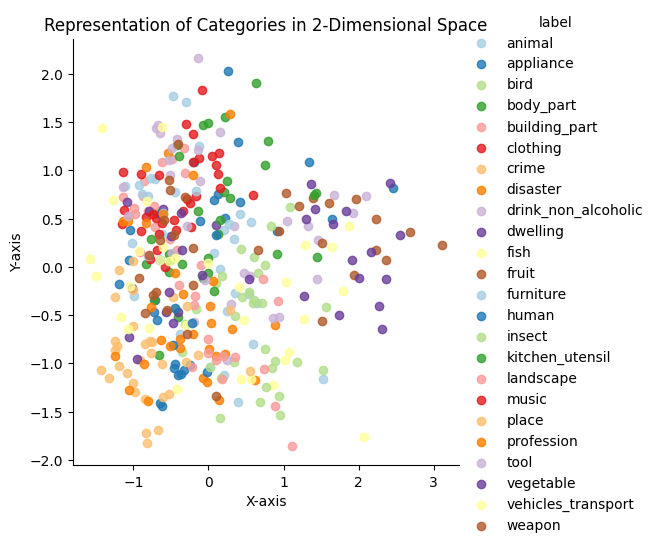

In [18]:
import seaborn as sns
sns.lmplot(x='x', y='y', data=df, hue='label', palette=palette,fit_reg=False)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Representation of Categories in 2-Dimensional Space')
plt.show()

**KNN**

We will perform KNN twice

One time, when the vector is in their original length(300),
and another time, after thr PCA.

Original length

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

index_dict_progonal = {key:index for index, key in enumerate(final_original_category_dict.keys())}
palette = sns.color_palette('Paired', 24)
data_original = {f'x{i}': [] for i in range(0, 300)}
for category_label, category_data in final_original_category_dict.items():
    for point in category_data:
      for index, i in enumerate(point):
        data_original[f'x{index}'].append(i)
df_original = pd.DataFrame(data_original)

X_original = df_original  # Features
y = df['label']     # Target variable

X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
k = 5  # Choose the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy with original length vectors: {round(accuracy*100,3)}%")

Accuracy with original length vectors: 72.727%


after performing PCA

In [22]:

X = df[['x', 'y']]  # Features
y = df['label']     # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
k = 5  # Choose the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy after performing PCA: {round(accuracy*100,3)}%")

Accuracy after performing PCA: 12.987%


The scatter plot of the 2-dimensional representation of the data shows little differentiation between the categories. This indicates that the data points are not easily separable in a linear manner.

There could be multiple reasons for this lack of linear separability. One possibility is that the dimensionality reduction process using PCA resulted in information loss. Additionally, the embedding itself or the presence of similar categories with similar sentences might contribute to the difficulty in accurately classifying the data.

When the KNN classifier is applied to the original vectors in their original length of 300 dimensions, the accuracy significantly improves from 18% to 68%. While it is not the highest accuracy, it is substantially better than the accuracy achieved after applying PCA.

This drop in accuracy from 74% to 12% after PCA can be attributed to the inherent loss of information caused by reducing the dimensionality from 300 to 2 using PCA.

##**Kmeans prediction**

We analyze the 24 given concepts  in experiment 2. We will examine the similarity among sentences pertaining to each concept. Specifically, we will calculate the average cosine similarity to determine how closely related the sentences are within each concept. This analysis will provide insights into the overall coherence and cohesion of sentences associated with each specific concept.

In [23]:
from math import comb
category_avarage_cosine = {}
for category, values in final_original_category_dict.items():
  cosine = 0
  i = 0
  for small_index, value in enumerate(values):
    for bigger_index, another_value in enumerate(values):
      if bigger_index > small_index:
        cosine+= cosine_similarity(value, another_value)
        i+=1
  category_avarage_cosine[category] = cosine/comb(len(values), 2)
  cosine = 0

In [24]:
sorted_data = sorted(category_avarage_cosine.items(), key=lambda x: x[1], reverse=True)
ordered_dict = dict(sorted_data)
ordered_dict

{'furniture': 0.7613683690408705,
 'building_part': 0.7532112205795866,
 'drink_non_alcoholic': 0.7380305601955436,
 'dwelling': 0.737889512502642,
 'tool': 0.7251406203739231,
 'disaster': 0.7245401581507291,
 'human': 0.7180044313849365,
 'fruit': 0.7132727724140064,
 'clothing': 0.701626882651225,
 'body_part': 0.7011315923452214,
 'kitchen_utensil': 0.6993472622972511,
 'weapon': 0.698411410648827,
 'crime': 0.6896088075721124,
 'vegetable': 0.6872398708311643,
 'music': 0.6861061361967822,
 'insect': 0.6838983176312442,
 'vehicles_transport': 0.6833533394118966,
 'appliance': 0.6825793083396526,
 'place': 0.6704181588281132,
 'bird': 0.6624044081105112,
 'fish': 0.6581744738104792,
 'landscape': 0.6575048613255908,
 'animal': 0.6457917132873088,
 'profession': 0.5572432092525258}

We will take the best 3 concepts in terms of coherence and aplly Kmeans algorithem

Than, we will take the worst 3 concepts in terms of coherence and aplly Kmeans algorithem

We are assuming it can predict better the 3 best concepts, it will help us understand how important it is to have coherence in the category.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
palette = sns.color_palette('Paired', 24)
for category_label, category_data in final_PCA_category_dict.items():
  if category_label in ['furniture','building_part','drink_non_alcoholic']:
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(category_label)
data = {'x': X_cord, 'y': Y_cord, 'label': labels}
df_best = pd.DataFrame(data)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
palette = sns.color_palette('Paired', 24)
for category_label, category_data in final_PCA_category_dict.items():
  if category_label in ['landscape','animal','profession']:
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(category_label)
data = {'x': X_cord, 'y': Y_cord, 'label': labels}
df_worst = pd.DataFrame(data)

We took the best 3 concepts in terms of coherence
We will aplly Kmeans algorithem

In [27]:
import numpy as np
from sklearn.cluster import KMeans

def Kmeans(df):
  # Extract the feature columns (x_cord, y_cord) from the DataFrame
  features = df[['x', 'y']].values

  # Set the number of clusters
  num_clusters = 3

  # Perform K-means clustering
  kmeans = KMeans(n_clusters=num_clusters,n_init=10, random_state=0)
  kmeans.fit(features)

  # Get the cluster assignments for each data point
  cluster_labels = kmeans.labels_

  # Get the cluster centers (centroids)
  cluster_centers = kmeans.cluster_centers_

  # Assign labels to each cluster based on the majority label within the cluster
  cluster_labels_unique = np.unique(cluster_labels)
  cluster_labels_mapping = {}

  for label in cluster_labels_unique:
      # Get the data points belonging to the current cluster
      cluster_data_points = df.loc[cluster_labels == label]

      # Count the occurrences of each label within the cluster
      label_counts = cluster_data_points['label'].value_counts()

      # Get the majority label
      majority_label = label_counts.idxmax()

      # Assign the majority label to the cluster
      cluster_labels_mapping[label] = majority_label
  return kmeans.labels_

In [28]:
from sklearn.metrics import fowlkes_mallows_score

labels_best = Kmeans(df_best)
labels_worst = Kmeans(df_worst)

true_labels_best = df_best['label'].values
true_labels_worst = df_worst['label'].values

# Calculate the Fowlkes-Mallows Index (FMI)
fmi_score_best = fowlkes_mallows_score(true_labels_best, labels_best)
fmi_score_worst = fowlkes_mallows_score(true_labels_worst, labels_worst)

print("FMI Score for categories with the best coherence:", fmi_score_best)
print("FMI Score for categories with the worst coherence:", fmi_score_worst)

FMI Score for categories with the best coherence: 0.6271776587316306
FMI Score for categories with the worst coherence: 0.4502754593314401


Our observation has confirmed the assumption that concepts with higher coherence are more easily predictable using the K-means algorithm. This finding highlights the significance of coherence in determining the accuracy and effectiveness of K-means clustering.


The principle also holds true in the context of human cognition. Sentences that exhibit greater similarity to other sentences within the same category are more readily predictable in terms of their category.

## **Categories Similaritie**

We will use word2vec

In [29]:
model = downloader.load('word2vec-google-news-300')
#build vectors matrix for word2vec

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [58]:
key_list = final_dict_exp2.keys()
new_key_list = []
c={}
for key in key_list:
  if key == 'body_part':
    key = 'limb'
  if key == 'building_part':
    key = 'component'
  if key == 'drink_non_alcoholic':
    key = 'Beverage'
  if key == 'kitchen_utensil':
    key = 'kitchen'
  if key == 'vehicles_transport':
    key = 'vehicles'
  new_key_list.append(key)
  c[key] = model[key]

In [59]:
cosines = {}
for index,key in enumerate(new_key_list):
  for b_index,b_key in enumerate(new_key_list):
    if b_index>index:
      cosines[key, b_key] = cosine_similarity(c[key], c[b_key])

In [60]:
import collections
sorted_dict = collections.OrderedDict(sorted(cosines.items(), key=lambda x: x[1], reverse=True))
sorted_dict

OrderedDict([(('bird', 'insect'), 0.5714030955871164),
             (('fruit', 'vegetable'), 0.5614408100026846),
             (('clothing', 'furniture'), 0.5443949292653314),
             (('animal', 'bird'), 0.5277917560322867),
             (('animal', 'human'), 0.49877764963831256),
             (('bird', 'fish'), 0.49408521080120277),
             (('furniture', 'kitchen'), 0.47573995304514266),
             (('animal', 'insect'), 0.44701073597634433),
             (('component', 'tool'), 0.4388916588371393),
             (('appliance', 'furniture'), 0.40481052545764046),
             (('tool', 'weapon'), 0.3802108598010216),
             (('appliance', 'kitchen'), 0.3713459227729553),
             (('fruit', 'insect'), 0.36297379627985443),
             (('fish', 'insect'), 0.35742731642730285),
             (('fish', 'vegetable'), 0.35561979953623574),
             (('animal', 'fish'), 0.34451102880861373),
             (('fish', 'fruit'), 0.3353672888492358),
             (('hu

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
palette = ['red','blue']
for category_label, category_data in final_PCA_category_dict.items():
  if category_label in ['fruit', 'vegetable']:
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(category_label)
data = {'x': X_cord, 'y': Y_cord, 'label': labels}
df = pd.DataFrame(data)

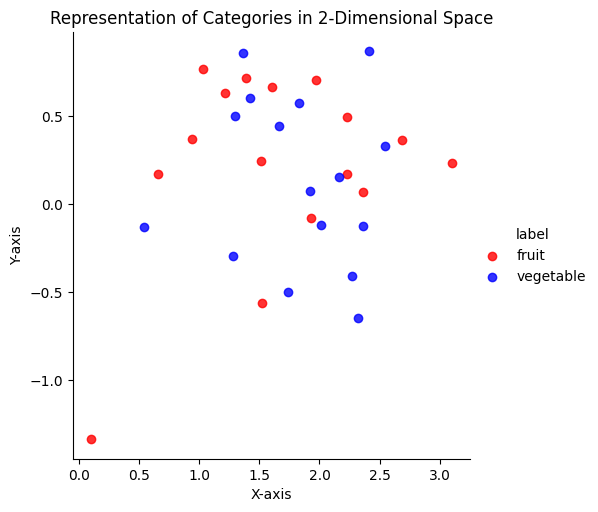

In [62]:
import seaborn as sns
sns.lmplot(x='x', y='y', data=df, hue='label', palette=palette,fit_reg=False)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Representation of Categories in 2-Dimensional Space')
plt.show()

In [63]:
X_cord = []
Y_cord = []
labels = []
index_dict = {key:index for index, key in enumerate(final_PCA_category_dict.keys())}
palette = ['red','blue']
for category_label, category_data in final_PCA_category_dict.items():
  if category_label in ['bird', 'clothing']:
    for point in category_data:
      X_cord.append(point[0])
      Y_cord.append(point[1])
      labels.append(category_label)
data = {'x': X_cord, 'y': Y_cord, 'label': labels}
df = pd.DataFrame(data)

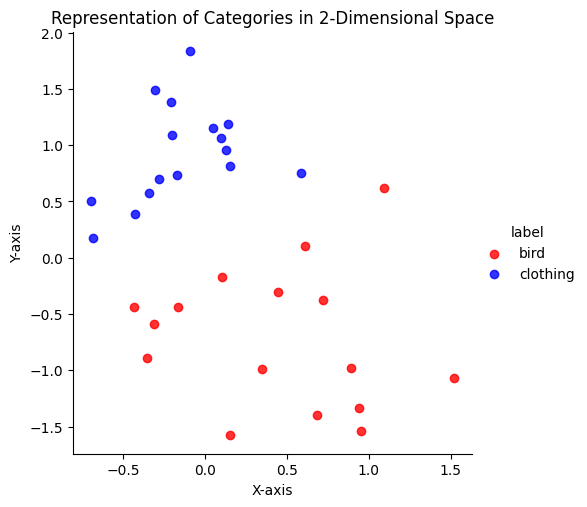

In [64]:
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.lmplot(x='x', y='y', data=df, hue='label', palette=palette, fit_reg=False)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Representation of Categories in 2-Dimensional Space')
plt.show()

## **For prolific**

We will choose 5 categories
Two from the top
One from the middle
Two from the buttom

For each category, we will choose 5 random sentences.

We'll ask the users to guess wich group of sentences represnt more similar idea

Than we will compare it to our results(more similar idea = closer vectors = category with higher coherence).

Remember the structed part bullet 3 and 4


In [66]:
import collections
sorted_dict = collections.OrderedDict(sorted(final_dict_exp2.items(), key=lambda x: x[1], reverse=True))
sorted_dict

OrderedDict([('body_part', 0.8191731770833333),
             ('human', 0.7610677083333333),
             ('drink_non_alcoholic', 0.7449544270833334),
             ('dwelling', 0.70654296875),
             ('appliance', 0.7063802083333334),
             ('furniture', 0.6591796875),
             ('kitchen_utensil', 0.634765625),
             ('disaster', 0.61376953125),
             ('fish', 0.6057942708333334),
             ('tool', 0.60400390625),
             ('bird', 0.5955403645833333),
             ('place', 0.5924479166666666),
             ('building_part', 0.5895182291666667),
             ('clothing', 0.5851236979166667),
             ('weapon', 0.5760091145833333),
             ('crime', 0.5732421875),
             ('fruit', 0.54345703125),
             ('landscape', 0.54296875),
             ('insect', 0.5341796875),
             ('music', 0.5208333333333334),
             ('vehicles_transport', 0.5164388020833333),
             ('animal', 0.49153645833333326),
             (

In [ ]:
Chosen_categories= ['body_part', 'drink_non_alcoholic', 'landscape','profession']

In [ ]:
from matplotlib.legend import silent_list
import random
vectors_list = exp2_vectors.tolist()
category_sen_dict = {}
# Choose 5 random numbers from 1 to 16
random_numbers = random.sample(range(0, 16), 3)
for category in Chosen_categories:
  sen_list = []
  dict_dactegory = final_original_category_dict[category]
  for number in random_numbers:
    indices = np.where(np.array([np.array_equal(final_original_category_dict[category][number], arr) for arr in vectors_list]))
    index = indices[0][0]
    sen_list.append(exp2_data['keySentences'][index][0][0])
  category_sen_dict[category] = sen_list

In [ ]:
category_sen_dict

## Bar plots

In [67]:
from sklearn.decomposition import PCA
def PCAA(vectors):
  pca = PCA(vectors)
  pca.n_components=50
  # Fit the PCA model to your data
  pca.fit(vectors)

  # Transform the data to the lower-dimensional representation
  X_reduced = pca.transform(vectors)
  return X_reduced

In [68]:
from math import comb
def create_cosine_dict(curr_dict):
  category_avarage_cosine = {}
  for category, values in curr_dict.items():
    cosine = 0
    i = 0
    for small_index, value in enumerate(values):
      for bigger_index, another_value in enumerate(values):
        if bigger_index > small_index:
          cosine+= cosine_similarity(value, another_value)
          i+=1
    category_avarage_cosine[category] = cosine/comb(len(values), 2)
    cosine = 0
  return category_avarage_cosine

In [69]:
import matplotlib.pyplot as plt

def bar_plot(curr_dict, title):
    keys = list(curr_dict.keys())
    values = list(curr_dict.values())

    plt.bar(keys, values)
    plt.xlabel('Keys')
    plt.ylabel('Values')
    plt.title(title)
    plt.xticks(rotation=90)

    plt.show()

Sentences

In [70]:
sen_cosine_dict = create_cosine_dict(final_original_category_dict)
sorted_sen_data = sorted(category_avarage_cosine.items(), key=lambda x: x[1], reverse=True)
ordered_sen_dict = dict(sorted_sen_data)
ordered_sen_dict

{'furniture': 0.7613683690408705,
 'building_part': 0.7532112205795866,
 'drink_non_alcoholic': 0.7380305601955436,
 'dwelling': 0.737889512502642,
 'tool': 0.7251406203739231,
 'disaster': 0.7245401581507291,
 'human': 0.7180044313849365,
 'fruit': 0.7132727724140064,
 'clothing': 0.701626882651225,
 'body_part': 0.7011315923452214,
 'kitchen_utensil': 0.6993472622972511,
 'weapon': 0.698411410648827,
 'crime': 0.6896088075721124,
 'vegetable': 0.6872398708311643,
 'music': 0.6861061361967822,
 'insect': 0.6838983176312442,
 'vehicles_transport': 0.6833533394118966,
 'appliance': 0.6825793083396526,
 'place': 0.6704181588281132,
 'bird': 0.6624044081105112,
 'fish': 0.6581744738104792,
 'landscape': 0.6575048613255908,
 'animal': 0.6457917132873088,
 'profession': 0.5572432092525258}

Voxels

In [71]:
voxels_50 = PCAA(exp2_data_mat)

In [72]:
final_original_category_dict_voxels = {}
for key, value in category_to_passage_map_name.items():
  final_original_category_dict_voxels[key] = [voxels_50[i-1] for i in value]

In [73]:
voxels_cosine_dict = create_cosine_dict(final_original_category_dict_voxels)

In [74]:
sorted_vox_data = sorted(voxels_cosine_dict.items(), key=lambda x: x[1], reverse=True)
ordered_vox_dict = dict(sorted_vox_data)
ordered_vox_dict

{'insect': 0.20364676916663438,
 'building_part': 0.14699075848111665,
 'crime': 0.13225288602106064,
 'human': 0.09079987999129743,
 'place': 0.0691227875865343,
 'vegetable': 0.0682973850252525,
 'fruit': 0.06304193864325439,
 'drink_non_alcoholic': 0.06176091859128001,
 'kitchen_utensil': 0.056290412553502055,
 'furniture': 0.056076606790235774,
 'body_part': 0.04677486247504383,
 'tool': 0.037507251603518935,
 'weapon': 0.03724295920642439,
 'vehicles_transport': 0.03626331976911594,
 'disaster': 0.03572411954232275,
 'appliance': 0.0344321058328452,
 'profession': 0.025880031884441625,
 'animal': 0.024672402196972417,
 'landscape': 0.02125261799687171,
 'music': 0.01915692413465181,
 'bird': 0.009876011475593475,
 'clothing': 0.007369059291166083,
 'fish': -8.900478522296205e-05,
 'dwelling': -0.00029671678818880923}

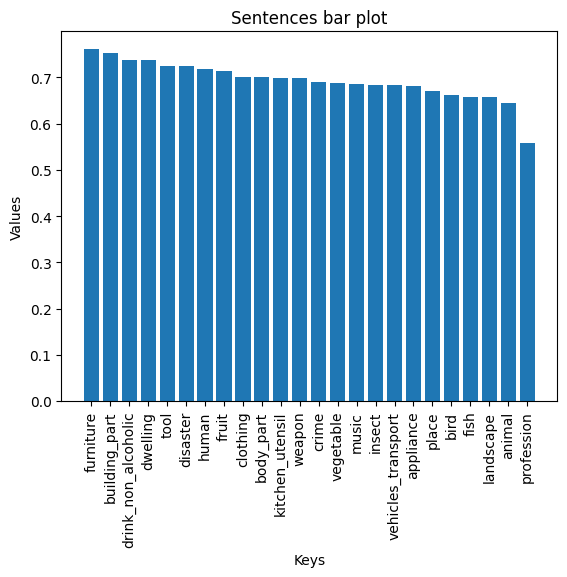

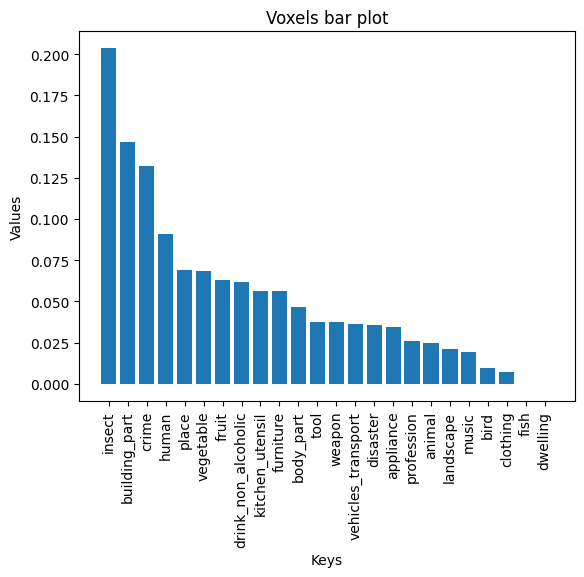

In [75]:
bar_plot(ordered_sen_dict, 'Sentences bar plot')
bar_plot(ordered_vox_dict,'Voxels bar plot')

## Voxels Kmeans

In [80]:
from sklearn.cluster import KMeans
from collections import defaultdict

def voxels_kmeans(vectors, labels):
# Assuming you have a matrix named 'vectors' and a list of corresponding labels named 'labels'
# vectors.shape should be (n, 50) where n is the number of vectors

  # Define the vectors and labels
  # Perform k-means clustering
  returned_dict = {}
  k = 5  # Number of clusters
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(vectors)

  # Get the cluster labels
  cluster_labels = kmeans.labels_

  # Create a dictionary to store majority cluster labels and percentages for each original label
  majority_clusters = defaultdict(list)

  # Assign cluster labels to each vector
  for i, vector in enumerate(vectors):
      label = labels[i]
      cluster_label = cluster_labels[i]
      majority_clusters[label].append(cluster_label)

  # Determine the majority cluster label and percentage for each original label
  majority_cluster_labels = {}
  for label, clusters in majority_clusters.items():
      total_clusters = len(clusters)
      cluster_counts = {cluster: clusters.count(cluster) for cluster in set(clusters)}
      majority_cluster = max(cluster_counts, key=cluster_counts.get)
      majority_percentage = cluster_counts[majority_cluster] / total_clusters * 100
      majority_cluster_labels[label] = (majority_cluster, majority_percentage)

  # Print the majority cluster label and percentage for each original label
  for label, (majority_cluster, majority_percentage) in majority_cluster_labels.items():
    returned_dict[label] = majority_percentage
  # print(f"Label: {label}, Majority Cluster Label: {majority_cluster}, Majority Percentage: {majority_percentage}%"
  return returned_dict

In [81]:
vectors_list = []
labels = []
for key, values in final_original_category_dict_voxels.items():
  for value in values:
    vectors_list.append(value)
    labels.append(key)

In [82]:
kmeand_voxels = voxels_kmeans(vectors_list, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


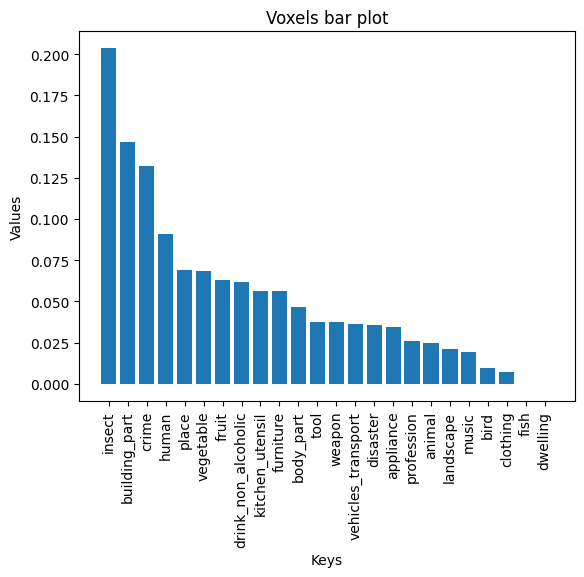

In [83]:
bar_plot(ordered_vox_dict,'Voxels bar plot')

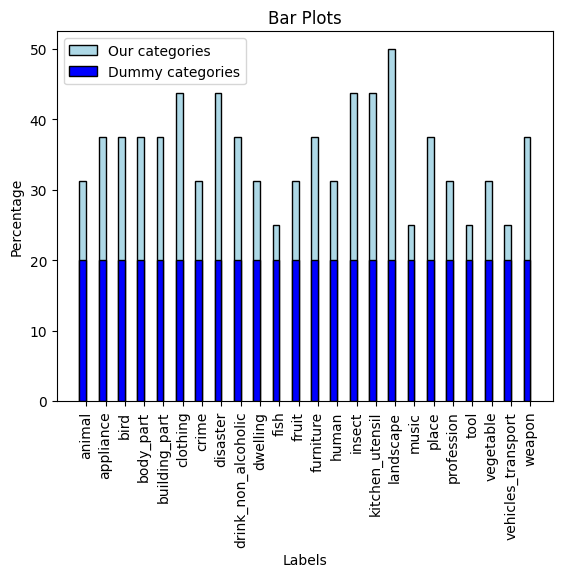

<Figure size 1000x600 with 0 Axes>

In [84]:
bar_width = 0.35
values1 = kmeand_voxels.values()
r1 = range(len(values1))
r2 = [x + bar_width for x in r1]
keys_plot = kmeand_voxels.keys()
values2 = [20 for i in range(len(values1))]

r1 = np.arange(len(values1))
r2 = r1 + bar_width
keys_plot = kmeand_voxels.keys()
# Create the bar plots
plt.bar(keys_plot, values1, color='lightblue', width=bar_width, edgecolor='black', label='Our categories')
plt.bar(keys_plot, values2, color='blue', width=bar_width, edgecolor='black', label='Dummy categories')

# Add labels, title, and legend
plt.xlabel('Labels')
plt.ylabel('Percentage')
plt.title('Bar Plots')
plt.xticks(r1 + bar_width/2,keys_plot,rotation=90 )
plt.legend()

plt.figure(figsize=(10, 6))
# Show the plot
plt.show()

## Heatmap

In [85]:
import numpy as np
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(vectors):
  # Calculate cosine similarity matrix
  cosine_sim = 1 - cdist(vectors, vectors, metric='cosine')
  vector = cosine_sim.flatten()  # Shape: (147456,)
  # Reshape the flattened vector to a column vector
  vector = vector.reshape(-1, 1)
  return vector

In [86]:
vector_sen = heatmap(exp2_vectors)
vector_voxels = heatmap(voxels_50)

In [87]:
from scipy.stats import pearsonr

# Assuming vector1 and vector2 are your two long vectors

# Calculate the Pearson correlation coefficient and p-value
vector1 = np.ravel(vector_sen)
vector2 = np.ravel(vector_voxels)

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(vector1, vector2)
# correlation, p_value = pearsonr(vector_sen, vector_sen,)

# Print the correlation coefficient
print("Pearson correlation coefficient:", correlation)

# Print the p-value
print("p-value:", p_value)

Pearson correlation coefficient: 0.04434270676905372
p-value: 4.45346104075235e-65
